In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency,zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
import warnings
warnings.filterwarnings("ignore", message="X has feature names")


In [2]:
# Load dataset
heart_df = pd.read_csv('heart.csv')

##### Display basic information about the dataset

In [3]:
print(heart_df.info())
print(heart_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

In [4]:
# Identify numerical and categorical features
numerical_features = heart_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

#  1. DATA CLEANING

In [5]:
# Check for missing values
print("\nMissing Values:\n", heart_df.isnull().sum())


Missing Values:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [6]:
# Drop duplicates if any
heart_df.drop_duplicates(inplace=True)

# 2. OUTLIER DETECTION


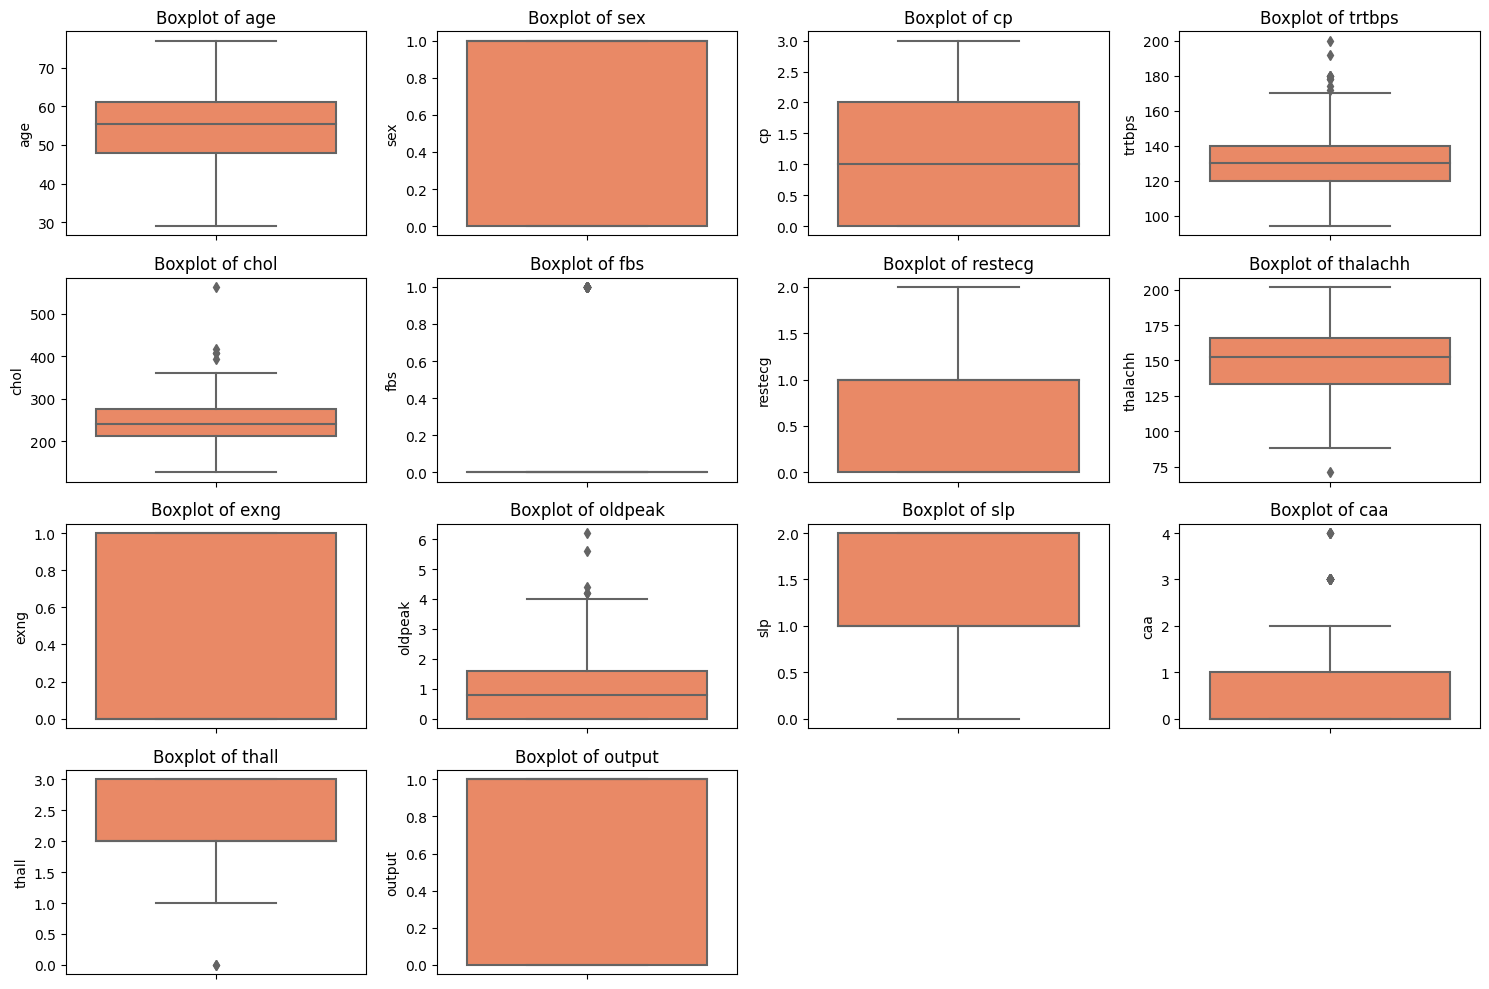

In [7]:
# Boxplot to visualize outliers in numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=heart_df[feature], color='coral')
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [8]:
# Detect outliers using Z-score (Threshold: |Z| > 3)
outliers = heart_df[(np.abs(zscore(heart_df[numerical_features])) > 3).any(axis=1)]
print("Outliers detected:\n", outliers)

Outliers detected:
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
28    65    0   2     140   417    1        0       157     0      0.8    2   
48    53    0   2     128   216    0        0       115     0      0.0    2   
85    67    0   2     115   564    0        0       160     0      1.6    1   
92    52    1   2     138   223    0        1       169     0      0.0    2   
158   58    1   1     125   220    0        1       144     0      0.4    1   
163   38    1   2     138   175    0        1       173     0      0.0    2   
204   62    0   0     160   164    0        0       145     0      6.2    0   
220   63    0   0     150   407    0        0       154     0      4.0    1   
221   55    1   0     140   217    0        1       111     1      5.6    0   
223   56    0   0     200   288    1        0       133     1      4.0    0   
246   56    0   0     134   409    0        0       150     1      1.9    1   
248   54    1   1     192   283 

# 3. RELATIONSHIP ANALYSIS

In [9]:
# 3. RELATIONSHIP ANALYSIS

# Chi-Square Test for Categorical Variables
for feature in categorical_features:
    contingency_table = pd.crosstab(heart_df[feature], heart_df['output'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between '{feature}' and 'output': p-value = {p:.4f}")

Chi-square test between 'sex' and 'output': p-value = 0.0000
Chi-square test between 'cp' and 'output': p-value = 0.0000
Chi-square test between 'fbs' and 'output': p-value = 0.7611
Chi-square test between 'restecg' and 'output': p-value = 0.0077
Chi-square test between 'exng' and 'output': p-value = 0.0000
Chi-square test between 'slp' and 'output': p-value = 0.0000
Chi-square test between 'caa' and 'output': p-value = 0.0000
Chi-square test between 'thall' and 'output': p-value = 0.0000


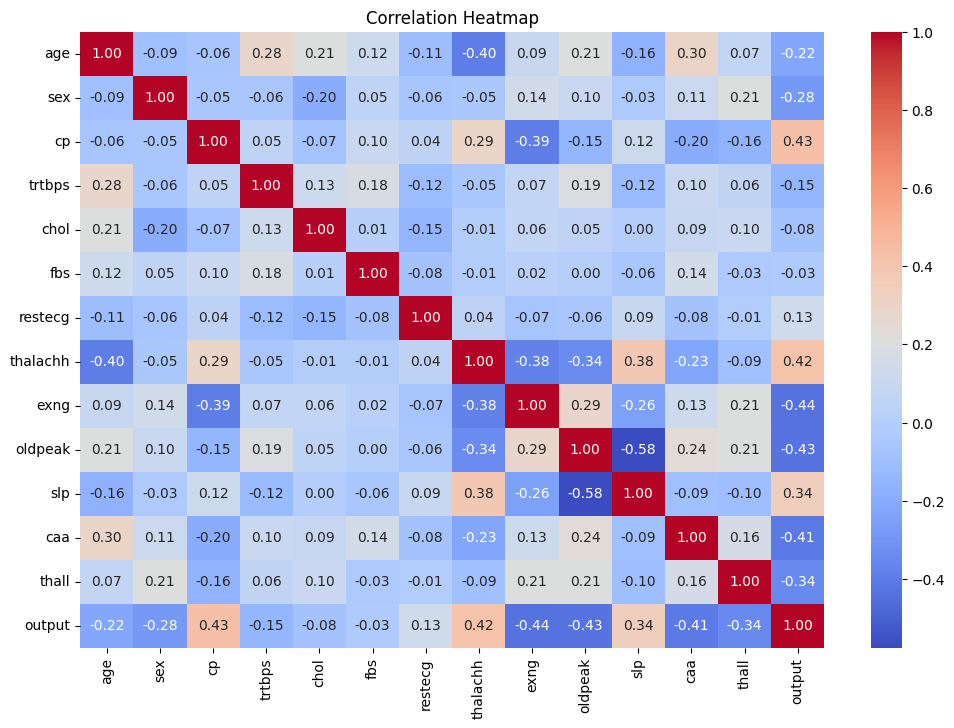

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

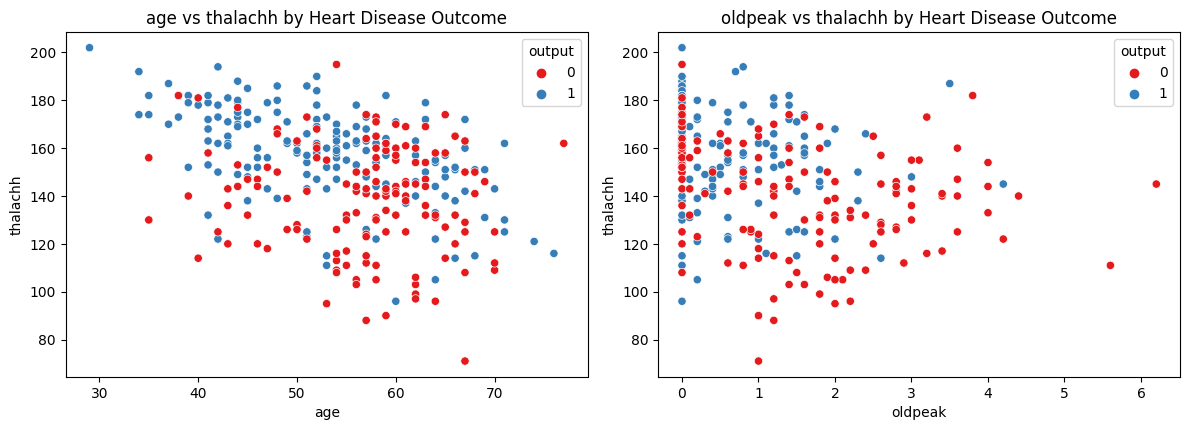

In [41]:
# 3. Scatter Plots (Key Feature Interactions with Outcome)
interaction_pairs = [('age', 'thalachh'),  ('oldpeak', 'thalachh')]
plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(interaction_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=heart_df[x], y=heart_df[y], hue=heart_df['output'], palette='Set1')
    plt.title(f'{x} vs {y} by Heart Disease Outcome')
plt.tight_layout()
plt.show()

In [ ]:
# Pair plot for continuous variables (reduced to avoid performance issues)
sns.pairplot(heart_df.sample(150, random_state=42), vars=numerical_features, hue='output', palette='husl')
plt.show()

KeyError: 'chol'

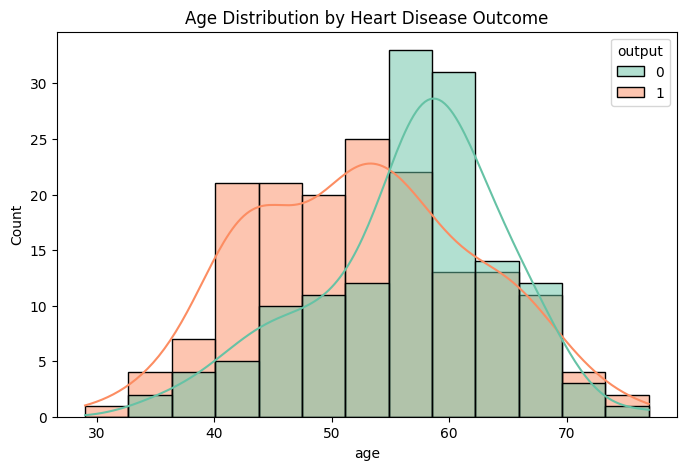

In [12]:
# Age distribution by heart disease outcome
plt.figure(figsize=(8, 5))
sns.histplot(heart_df, x='age', hue='output', kde=True, palette='Set2')
plt.title('Age Distribution by Heart Disease Outcome')
plt.show()

In [13]:
# Chi-Square Test for Categorical Variables
for feature in categorical_features:
    contingency_table = pd.crosstab(heart_df[feature], heart_df['output'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between '{feature}' and 'output': p-value = {p:.4f}")


Chi-square test between 'sex' and 'output': p-value = 0.0000
Chi-square test between 'cp' and 'output': p-value = 0.0000
Chi-square test between 'fbs' and 'output': p-value = 0.7611
Chi-square test between 'restecg' and 'output': p-value = 0.0077
Chi-square test between 'exng' and 'output': p-value = 0.0000
Chi-square test between 'slp' and 'output': p-value = 0.0000
Chi-square test between 'caa' and 'output': p-value = 0.0000
Chi-square test between 'thall' and 'output': p-value = 0.0000


# 4. FEATURE ENGINEERING

In [14]:
# Create age groups (e.g., young, middle-aged, senior)
heart_df['age_group'] = pd.cut(heart_df['age'], bins=[20, 40, 60, 80], labels=['Young', 'Middle-Aged', 'Senior'])


In [15]:
# Interaction term: age * cholesterol
heart_df['age_chol_interaction'] = heart_df['age'] * heart_df['chol']

In [16]:
# Display the new features
print(heart_df[['age', 'age_group', 'age_chol_interaction']].head())

   age    age_group  age_chol_interaction
0   63       Senior                 14679
1   37        Young                  9250
2   41  Middle-Aged                  8364
3   56  Middle-Aged                 13216
4   57  Middle-Aged                 20178


# 5. CHECK FOR CLASS IMBALANCE

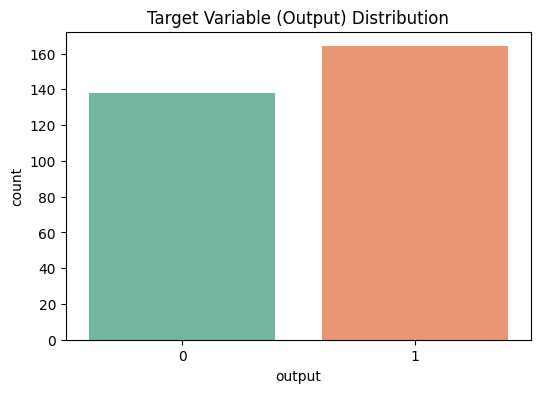

In [17]:
# Visualize the distribution of the target variable ('output')
plt.figure(figsize=(6, 4))
sns.countplot(x='output', data=heart_df, palette='Set2')
plt.title('Target Variable (Output) Distribution')
plt.show()

In [35]:
# Print class balance ratio
print("Class Balance:\n", heart_df['output'].value_counts(normalize=True))

Class Balance:
 1    0.543046
0    0.456954
Name: output, dtype: float64


# 6. STATISTICAL ANALYSIS

In [20]:
# T-Test for age and cholesterol based on heart disease outcome
t_stat, p_value = ttest_ind(heart_df[heart_df['output'] == 1]['age'], heart_df[heart_df['output'] == 0]['age'])
print(f"T-test for Age: p-value = {p_value:.4f}")

T-test for Age: p-value = 0.0001


In [21]:
t_stat, p_value = ttest_ind(heart_df[heart_df['output'] == 1]['chol'], heart_df[heart_df['output'] == 0]['chol'])
print(f"T-test for Cholesterol: p-value = {p_value:.4f}")

T-test for Cholesterol: p-value = 0.1580


In [22]:
# ANOVA for categorical variables
anova_results = {}
for feature in categorical_features:
    groups = [heart_df[heart_df[feature] == category]['output'] for category in heart_df[feature].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[feature] = p_value
print("ANOVA Results:", anova_results)

ANOVA Results: {'sex': 5.402435780432053e-07, 'cp': 4.548334700041951e-20, 'fbs': 0.6424070490676597, 'restecg': 0.007477844280185115, 'exng': 2.0464675890697795e-15, 'slp': 1.1088017630523999e-11, 'caa': 3.3955920412676666e-17, 'thall': 3.936276937998687e-21}


In [23]:
# Ensure all categorical variables are converted to numerical using one-hot encoding
X = pd.get_dummies(heart_df.drop(columns=['output']), drop_first=True)
y = heart_df['output']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression for feature importance
log_model = LogisticRegression()
log_model.fit(X_scaled, y)
print("Logistic Regression Coefficients:", dict(zip(X.columns, log_model.coef_[0])))


Logistic Regression Coefficients: {'age': -0.16678433840887572, 'sex': -0.7611439829720749, 'cp': 0.8362528923657855, 'trtbps': -0.32439066680939727, 'chol': -0.21506114398536372, 'fbs': 0.02403318087843419, 'restecg': 0.22580770125583538, 'thalachh': 0.5181571173710877, 'exng': -0.43929240190436075, 'oldpeak': -0.5784090821020954, 'slp': 0.3516126730796601, 'caa': -0.7862479876669654, 'thall': -0.5108045267839894, 'age_chol_interaction': -0.014254136350577306, 'age_group_Middle-Aged': 0.21495831568864232, 'age_group_Senior': 0.34569246387746577}


In [24]:
# Identify and convert non-numeric columns using one-hot encoding
X = heart_df.drop(columns=['output'])
y = heart_df['output']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression for feature importance
log_model = LogisticRegression()
log_model.fit(X_scaled, y)

print("Logistic Regression Coefficients:", dict(zip(X.columns, log_model.coef_[0])))


Non-numeric columns: Index(['age_group'], dtype='object')
Logistic Regression Coefficients: {'age': -0.16678433840887572, 'sex': -0.7611439829720749, 'cp': 0.8362528923657855, 'trtbps': -0.32439066680939727, 'chol': -0.21506114398536372, 'fbs': 0.02403318087843419, 'restecg': 0.22580770125583538, 'thalachh': 0.5181571173710877, 'exng': -0.43929240190436075, 'oldpeak': -0.5784090821020954, 'slp': 0.3516126730796601, 'caa': -0.7862479876669654, 'thall': -0.5108045267839894, 'age_chol_interaction': -0.014254136350577306, 'age_group_Middle-Aged': 0.21495831568864232, 'age_group_Senior': 0.34569246387746577}


# 7. FEATURE SELECTION AND IMPORTANCE

In [25]:
# Correlation thresholding
correlation_matrix = heart_df.corr(numeric_only=True)
high_correlation_features = set()
thresh = 0.75
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[col, idx]) > thresh and col != idx:
            high_correlation_features.add(idx)
print("Highly correlated features to drop:", high_correlation_features)
heart_df = heart_df.drop(columns=high_correlation_features)


Highly correlated features to drop: {'age_chol_interaction', 'chol'}


In [26]:
# Feature Importance using Random Forest

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode non-numeric columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Fit Random Forest and calculate feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)


Non-numeric columns: Index([], dtype='object')
Feature Importances:
 cp                       0.131508
thalachh                 0.122336
oldpeak                  0.111814
caa                      0.105805
thall                    0.104513
age_chol_interaction     0.071778
age                      0.069999
trtbps                   0.065957
chol                     0.058772
slp                      0.045475
sex                      0.037310
exng                     0.034036
restecg                  0.014591
fbs                      0.009654
age_group_Senior         0.008409
age_group_Middle-Aged    0.008043
dtype: float64


# 8. MODEL BUILDING

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
# Logistic Regression Model
# Encode categorical variables with One-Hot Encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both datasets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

# Scale the features (recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

print("Model training and predictions successful!")

Model training and predictions successful!


In [29]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]


In [30]:
# Model Evaluation
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Logistic Regression Performance:
Accuracy: 0.45901639344262296
Precision: 0.0
Recall: 0.0
ROC AUC: 0.5
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        28
           1       0.00      0.00      0.00        33

    accuracy                           0.46        61
   macro avg       0.23      0.50      0.31        61
weighted avg       0.21      0.46      0.29        61



C:\Users\maana\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maana\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maana\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maana\AppD

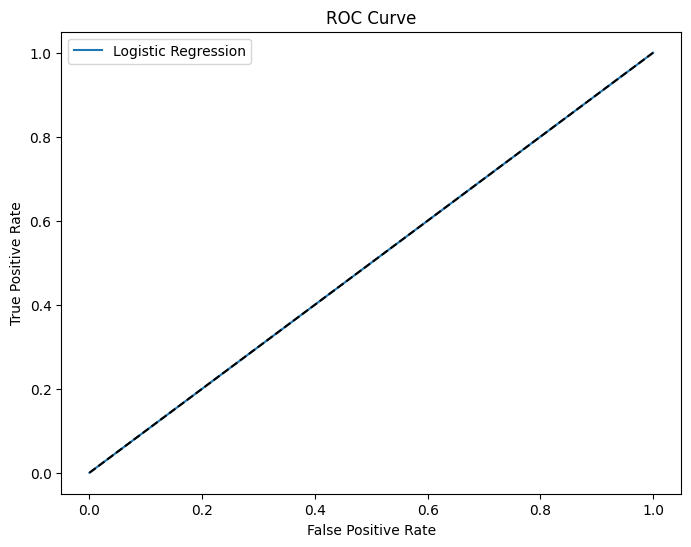

In [31]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [32]:
# Random Forest Model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [33]:
# Model Evaluation for Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.8032786885245902
Precision: 0.7560975609756098
Recall: 0.9393939393939394
ROC AUC: 0.8782467532467533
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



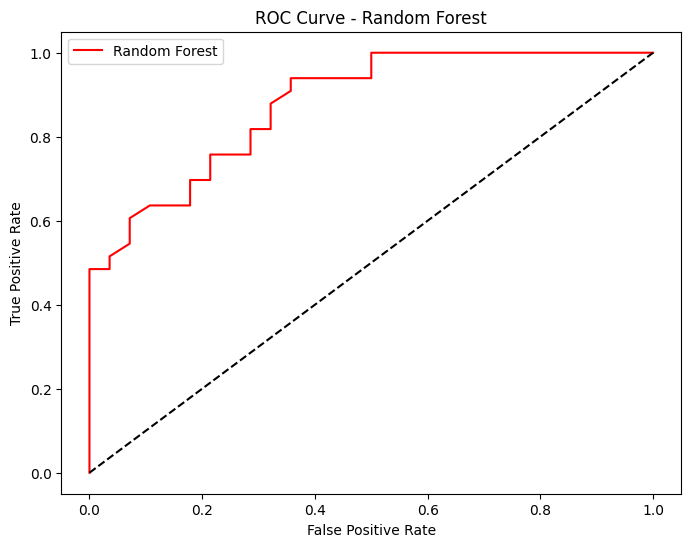

In [34]:
# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()